<a href="https://colab.research.google.com/github/DataCrusade1999/Quantitative-Analytics/blob/master/Quantitative_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas_datareader as pdr
import datetime
from datetime import date
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [246]:
url='https://raw.githubusercontent.com/DataCrusade1999/Python/master/Data/aapl.csv'

In [247]:
aapl=pd.read_csv(url)
#aapl['diff']=aapl.Open-aapl.Close

**PERFORMING EDA ON DATA**

In [248]:
aapl.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.241351
1,2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.145061
2,2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.305547
3,2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.237648
4,2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.162347


In [249]:
aapl.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
1318,2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,49.790466
1319,2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.185513
1320,2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,49.705292
1321,2011-12-29,57.950001,57.215714,57.628571,57.874287,53994500,50.011452
1322,2011-12-30,58.040001,57.641430,57.644287,57.857143,44915500,49.996635


In [250]:
aapl.shape

(1323, 7)

In [251]:
aapl.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [252]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,24.964252
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.201417
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.040131
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.063183
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,21.707180
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.442190
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.124886


In [253]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   High       1323 non-null   float64
 2   Low        1323 non-null   float64
 3   Open       1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Volume     1323 non-null   int64  
 6   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB


In [254]:
aapl.isnull()

,Date,High,Low,Open,Close,Volume,Adj Close
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1318,False,False,False,False,False,False,False
1319,False,False,False,False,False,False,False
1320,False,False,False,False,False,False,False
1321,False,False,False,False,False,False,False


In [255]:
aapl.index

RangeIndex(start=0, stop=1323, step=1)

In [256]:
aapl.iloc[[1,2], [0,2,3,4]]

,Date,Low,Open,Close
1,2006-10-03,10.455714,10.635715,10.582857
2,2006-10-04,10.451428,10.585714,10.768572


In [257]:
aapl.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close
545,2008-12-01,13.181429,12.702857,13.042857,12.704286,230941900,10.978272
305,2007-12-18,26.761429,25.514286,26.645714,26.139999,305650800,22.588604
1086,2011-01-25,48.777142,47.795715,48.047142,48.771427,136717000,42.145309
188,2007-07-03,18.200001,17.357143,17.428572,18.167143,290620400,15.698942
986,2010-09-01,35.922855,35.182858,35.352856,35.761429,174259400,30.902855
1208,2011-07-20,56.610001,55.142857,56.588570,55.271427,235335100,47.762222
478,2008-08-26,24.982857,24.658571,24.680000,24.805714,111387500,21.435602
698,2009-07-13,20.334286,19.647142,19.934286,20.334286,120875300,17.571653
1000,2010-09-22,41.139999,40.344284,40.387142,41.107143,146322400,35.522301
187,2007-07-02,17.441429,17.042856,17.292856,17.322857,248715600,14.969361


**ANALYSING RETURNS**

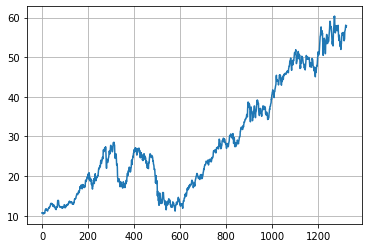

In [258]:
aapl['Close'].plot(grid=True)
plt.show()

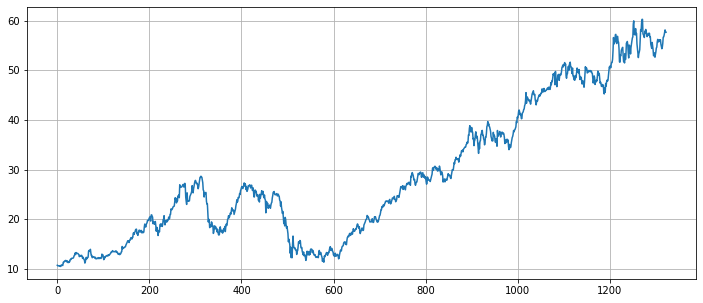

In [259]:
aapl['Open'].plot(grid=True,figsize=(12,5))
plt.show()

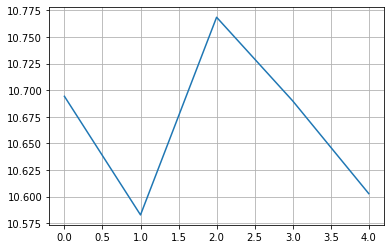

In [260]:
aapl['Close'].head(5).plot(grid=True)
plt.show()

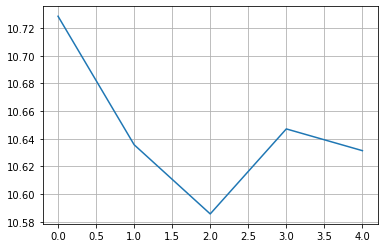

In [261]:
aapl['Open'].head(5).plot(grid=True)
plt.show()

In [262]:
daily_close=aapl[['Adj Close']]
daily_pct_change=daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.head(10)

,Adj Close
0,0.000000
1,-0.010419
2,0.017549
3,-0.007297
4,-0.008152
5,0.005524
6,-0.010988
7,-0.007858
8,0.027721
9,-0.003189


In [263]:
daily_log_returns = np.log(daily_close.pct_change()+1)
daily_log_returns.head(10)

,Adj Close
0,NaN
1,-0.010474
2,0.017397
3,-0.007323
4,-0.008185
5,0.005509
6,-0.011048
7,-0.007889
8,0.027344
9,-0.003194


In [264]:
#prefer this method while calculating daily percent change
daily_pct_change = daily_close / daily_close.shift(1) - 1
daily_pct_change.head(10)

,Adj Close
0,NaN
1,-0.010419
2,0.017549
3,-0.007297
4,-0.008152
5,0.005524
6,-0.010988
7,-0.007858
8,0.027721
9,-0.003189


In [265]:
daily_log_returns_shift=np.log(daily_close / daily_close.shift(1))
daily_log_returns_shift.head(10)

,Adj Close
0,NaN
1,-0.010474
2,0.017397
3,-0.007323
4,-0.008185
5,0.005509
6,-0.011048
7,-0.007889
8,0.027344
9,-0.003194


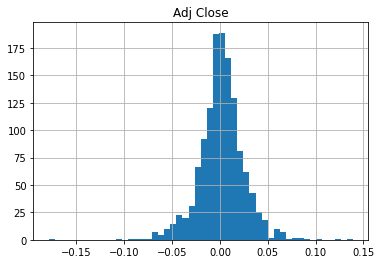

,Adj Close
count,1322.000000
mean,0.001566
std,0.023992
min,-0.179195
25%,-0.010672
50%,0.001677
75%,0.014306
max,0.139049


In [266]:
daily_pct_change.hist(bins=50)
plt.show()
daily_pct_change.describe()

In [267]:
cum_daily_return=(1+daily_pct_change).cumprod()
cum_daily_return.head(10)

,Adj Close
0,NaN
1,0.989581
2,1.006947
3,0.999599
4,0.991451
5,0.996928
6,0.985974
7,0.978226
8,1.005344
9,1.002137


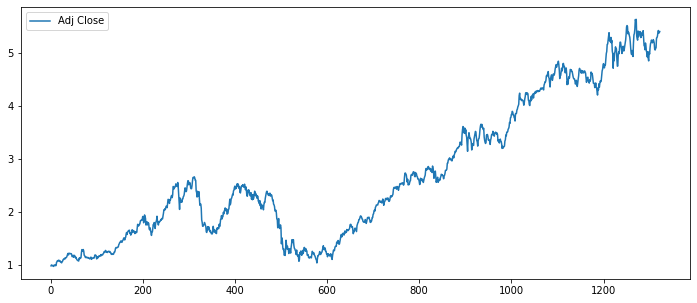

In [268]:
cum_daily_return.plot(figsize=(12,5))
plt.show()

In [269]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['GS', 'ORCL', 'BB','AAPL','BLK']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data

High         Low  ...     Volume   Adj Close
Ticker Date                                ...                       
GS     2006-10-02  171.449997  168.509995  ...  4143700.0  141.645538
       2006-10-03  174.399994  170.100006  ...  5823500.0  144.558304
       2006-10-04  176.660004  173.309998  ...  8069400.0  146.516724
       2006-10-05  176.520004  174.690002  ...  5749400.0  145.637100
       2006-10-06  176.000000  173.800003  ...  4898200.0  145.761581
...                       ...         ...  ...        ...         ...
BLK    2011-12-23  178.729996  175.000000  ...   313100.0  140.809265
       2011-12-27  179.770004  177.020004  ...   310700.0  140.359421
       2011-12-28  177.880005  175.899994  ...   301000.0  139.254456
       2011-12-29  179.500000  176.550003  ...   342200.0  141.590637
       2011-12-30  179.429993  177.869995  ...   252200.0  140.675156

[6615 rows x 6 columns]

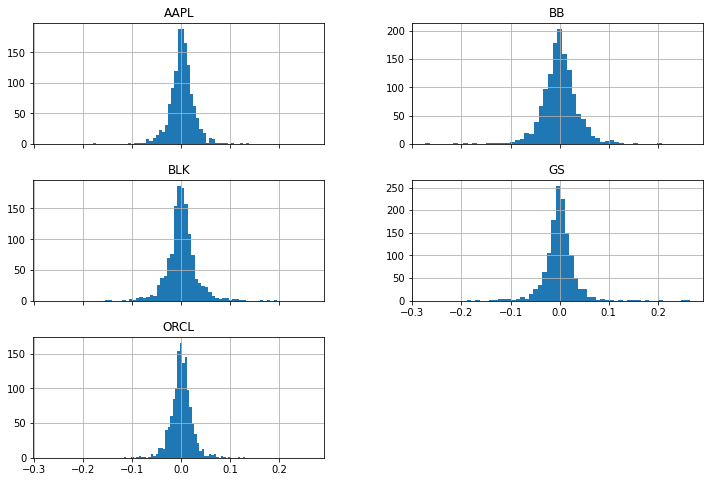

In [270]:
daily_close_nStocks=all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change=daily_close_nStocks.pct_change()
daily_pct_change.hist(bins=50,sharex=True,figsize=(12,8))
plt.show()

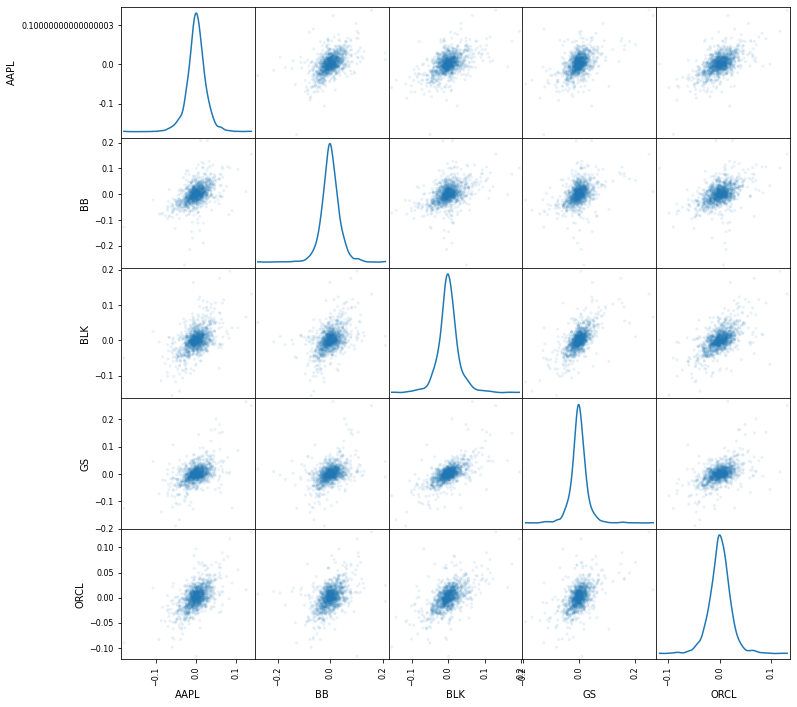

In [271]:
pd.plotting.scatter_matrix(daily_pct_change,diagonal='kde',figsize=(12,12),alpha=0.1)
plt.show()

In [272]:
daily_log_returns=np.log(daily_close_nStocks/daily_close_nStocks.shift(1))
daily_log_returns.head(10)

Ticker,AAPL,BB,BLK,GS,ORCL
Date,,,,,
2006-10-02,NaN,NaN,NaN,NaN,NaN
2006-10-03,-0.010474,0.020389,0.000828,0.020355,0.013498
2006-10-04,0.017396,0.063852,0.017998,0.013457,0.014972
2006-10-05,-0.007323,0.011151,0.011128,-0.006022,0.004940
2006-10-06,-0.008185,-0.011243,-0.000537,0.000854,-0.003841
2006-10-09,0.005509,0.043264,0.006689,0.010195,0.019598
2006-10-10,-0.011048,-0.007511,0.024234,0.007915,0.010190
2006-10-11,-0.007889,-0.009804,-0.007773,0.000615,-0.008574
2006-10-12,0.027343,-0.005569,-0.004139,0.014093,0.021826


**MOVING WINDOWS**

In [273]:
all_data[['Adj Close']].rolling(40).var()

Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23  40.236098
       2011-12-27  43.040584
       2011-12-28  44.509345
       2011-12-29  43.819276
       2011-12-30  44.408666

[6615 rows x 1 columns]

In [274]:
all_data[['Adj Close']].rolling(40).std()

Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23   6.343193
       2011-12-27   6.560532
       2011-12-28   6.671532
       2011-12-29   6.619613
       2011-12-30   6.663983

[6615 rows x 1 columns]

In [275]:
all_data[['Adj Close']].rolling(40).mean()

Adj Close
Ticker Date                  
GS     2006-10-02         NaN
       2006-10-03         NaN
       2006-10-04         NaN
       2006-10-05         NaN
       2006-10-06         NaN
...                       ...
BLK    2011-12-23  129.192283
       2011-12-27  129.378090
       2011-12-28  129.770960
       2011-12-29  130.374710
       2011-12-30  130.847527

[6615 rows x 1 columns]

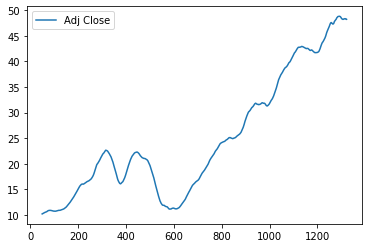

In [276]:
moving_average=aapl[['Adj Close']].rolling(50).mean()
moving_average.plot()
plt.show()

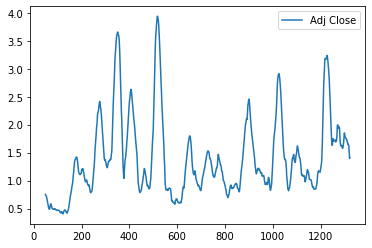

In [277]:
moving_std=aapl[['Adj Close']].rolling(50).std()
moving_std.plot()
plt.show()

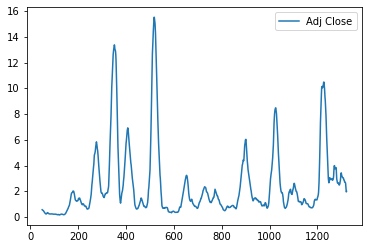

In [278]:
moving_var=aapl[['Adj Close']].rolling(50).var()
moving_var.plot()
plt.show()

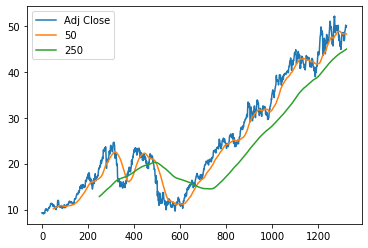

In [279]:
adj_close=aapl[['Adj Close']]
aapl['50']=adj_close.rolling(50).mean()
aapl['250']=adj_close.rolling(250).mean()
aapl[['Adj Close','50','250']].plot()
plt.show()

**VOLATILITY CALCULATIONS**

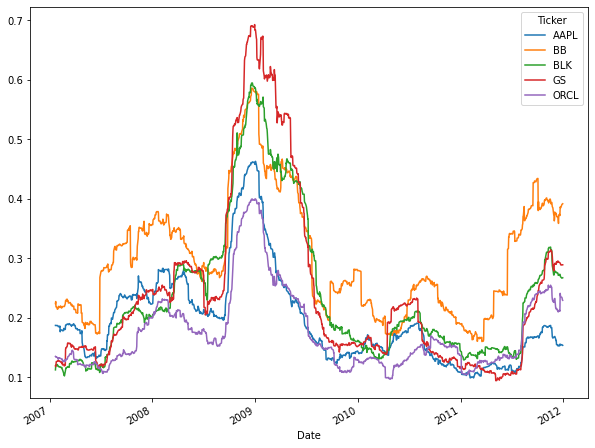

In [280]:
volatility=daily_pct_change.rolling(75).std()*np.sqrt(75)
volatility.plot(figsize=(10,8))
plt.show()

**Ordinary Least-Squares Regression (OLS)**



In [281]:
AAPL_returns=daily_log_returns.iloc[:,0]
GS_returns=daily_log_returns.iloc[:,3]
return_data=pd.concat([AAPL_returns,GS_returns],axis=1)[1:]
X = sm.add_constant(return_data['AAPL'])
model = sm.OLS(return_data['GS'],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           5.49e-78
Time:                        09:54:30   Log-Likelihood:                 2852.3
No. Observations:                1322   AIC:                            -5701.
Df Residuals:                    1320   BIC:                            -5690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.635      0.102      -0.003       0.000
AAPL           0.6406      0.032     20.007      0.000       0.578       0.703
==============================================================================
Omnibus:                      210.038   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3382.541
Skew:                           0.061   Prob(JB):                         0.00
Kurtosis:                      10.835   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

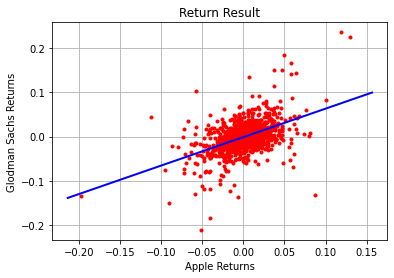

In [282]:
plt.plot(return_data['AAPL'],return_data['GS'],'r.')
ax = plt.axis()
x = np.linspace(ax[0] , ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', linewidth=2)
plt.grid(True)
plt.xlabel('Apple Returns')
plt.ylabel('Glodman Sachs Returns')
plt.title('Return Result')
plt.show()

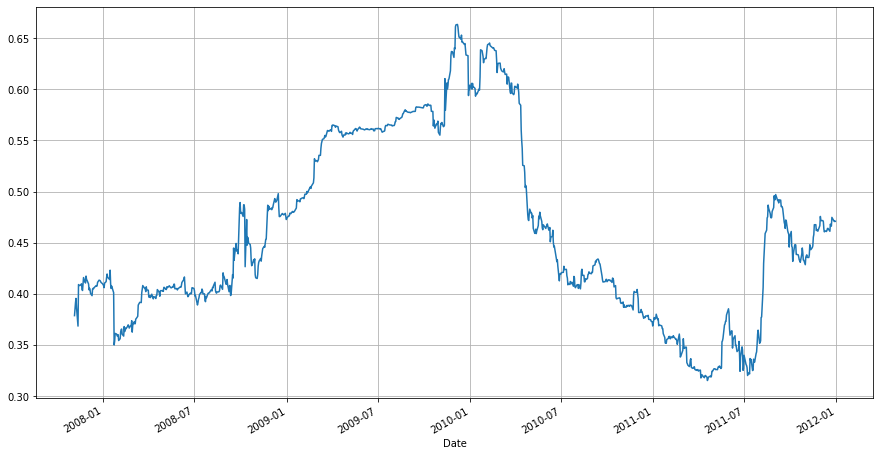

In [283]:
return_data['GS'].rolling(275).corr(return_data['AAPL']).plot(grid=True,figsize=(15,8))
plt.show()

**TRADING STRATEGY** (MOVING AVERAGE CROSSOVER)

**Remember that when you go long, you think that the stock price will go up and will sell at a higher price in the future (= buy signal); When you go short, you sell your stock, expecting that you can buy it back at a lower price and realize a profit (= sell signal).**

In [284]:
url='https://raw.githubusercontent.com/DataCrusade1999/Python/master/Data/BLK.csv'
BLK=pd.read_csv(url)
BLK.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-10-12,14.0625,14.1250,14.0000,14.1250,9.491266,49200
1,1999-10-13,14.1250,14.3750,14.0000,14.0625,9.449268,49900
2,1999-10-14,14.0000,14.0625,13.2500,13.6250,9.155289,430900
3,1999-10-15,13.1250,13.1875,12.6875,13.0625,8.777325,158200
4,1999-10-18,13.0000,13.0000,12.5000,12.8125,8.609335,83800


In [285]:
BLK.shape

(5264, 7)

In [286]:
BLK.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5259,2020-09-04,581.809998,584.090027,557.859985,564.630005,564.630005,822100
5260,2020-09-08,559.989990,560.770020,548.000000,552.539978,552.539978,837100
5261,2020-09-09,561.619995,564.099976,555.330017,560.179993,560.179993,830500
5262,2020-09-10,561.640015,561.960022,541.210022,543.309998,543.309998,891000
5263,2020-09-11,544.479980,547.450012,537.859985,541.200012,541.200012,660900


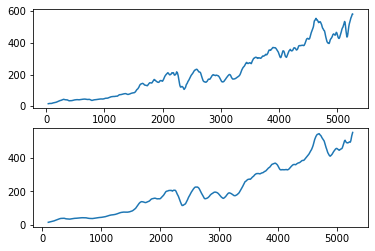

In [287]:
Short_av=BLK['Close'].rolling(40).mean()
plt.subplot(211)
Short_av.plot()
Long_av=BLK['Close'].rolling(100).mean()
plt.subplot(212)
Long_av.plot()
plt.show()

**After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!
Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.
0:Sell Signal
1:Buy Signal**

In [288]:
Short_Window=40
Long_Window=100
signals=pd.DataFrame(index=BLK.index)
signals['signal']=0.0
signals['short_mov_avg']=BLK['Close'].rolling(window=Short_Window,min_periods=1,center=False).mean()
signals['long_mov_avg']=BLK['Close'].rolling(window=Long_Window,min_periods=1,center=False).mean()
signals['signal'][Short_Window:]=np.where(signals['short_mov_avg'][Short_Window:]>signals['long_mov_avg'][Short_Window:],1.0,0.0)
signals['positions']=signals['signal'].diff()
print(signals.shape)
signals.sample(20)

(5264, 4)


,signal,short_mov_avg,long_mov_avg,positions
1493,1.0,84.258001,80.940600,0.0
2618,0.0,219.009000,226.199100,0.0
976,0.0,45.513250,45.616400,0.0
1439,1.0,77.734750,77.003300,0.0
2792,1.0,170.641750,159.622100,0.0
4095,1.0,331.344751,327.384800,0.0
3121,1.0,190.720251,175.494001,0.0
5249,1.0,571.316502,530.511403,0.0
2065,1.0,201.783250,182.754000,0.0
479,1.0,39.649000,36.729200,0.0


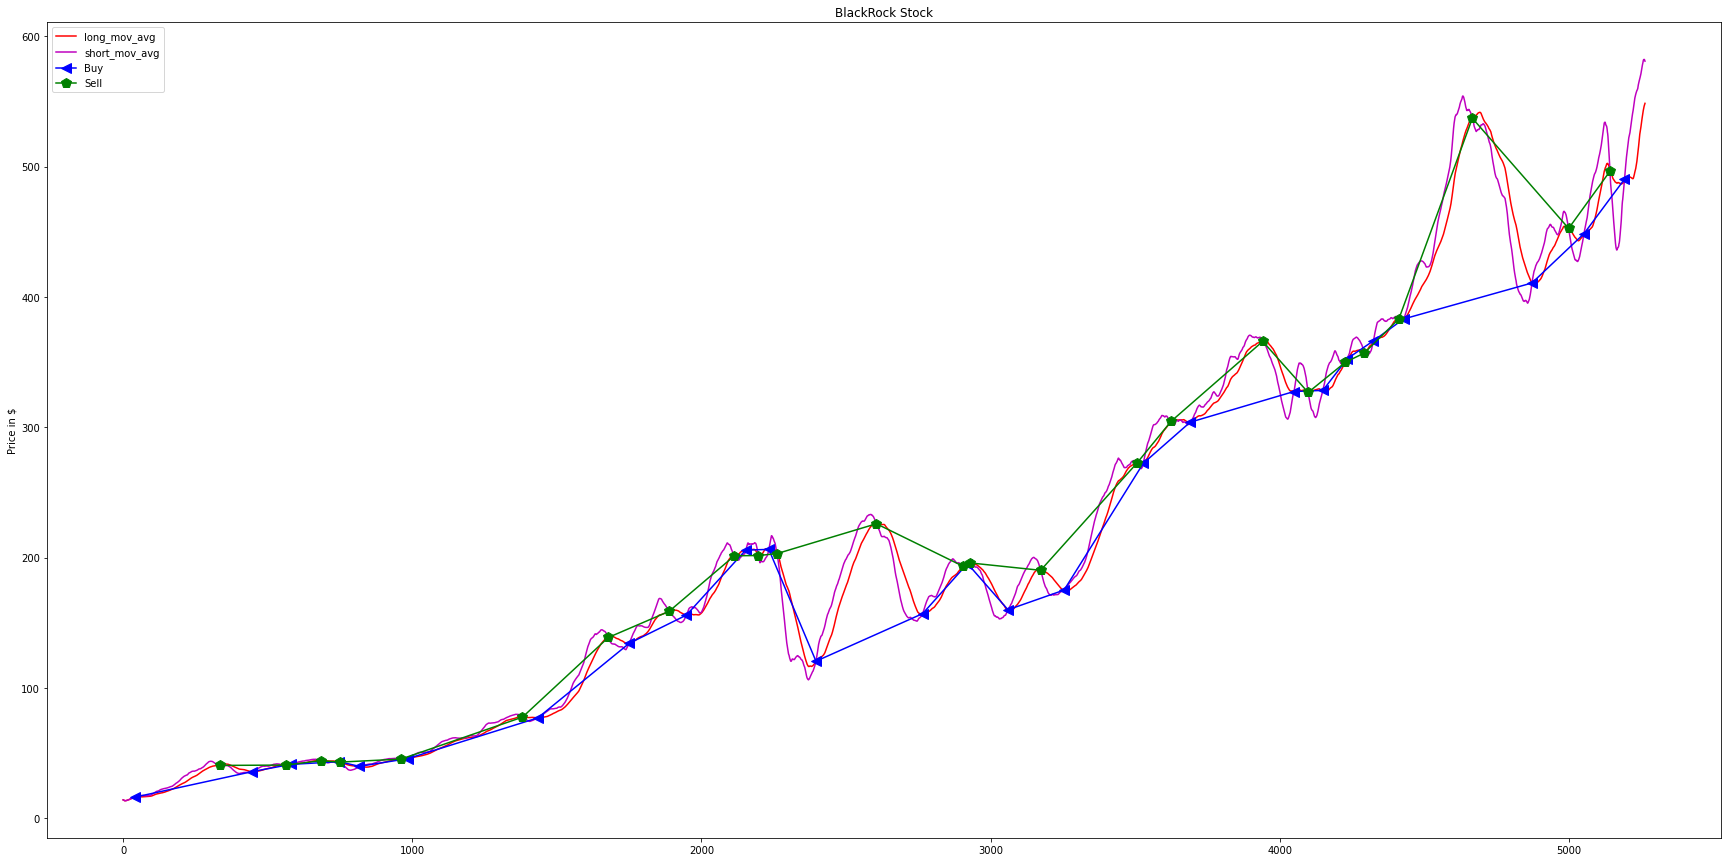

In [289]:
signals['long_mov_avg'].plot(color='r',figsize=(30,15))
signals['short_mov_avg'].plot(color='m',figsize=(30,15))
signals.short_mov_avg[signals.positions == 1.0].plot(marker='<',markersize=10,color='blue',label='Buy')
signals.short_mov_avg[signals.positions==-1.0].plot(marker='p',markersize=10,color='green',label='Sell')
plt.ylabel('Price in $')
plt.legend(loc='upper left')
plt.title('BlackRock Stock')
plt.show()

**PORTFOLIO**

In [290]:
initial_cap=float(100000.0)
positions=pd.DataFrame(index=signals.index).fillna(0.0)
positions['BLK']=100*signals['signal']
portfolio=pd.DataFrame(positions.multiply(BLK['Adj Close'], axis=0))
pos_diff = positions.diff()
portfolio['holding']=(positions.multiply(BLK['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash']=initial_cap - (pos_diff.multiply(BLK['Adj Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total']=portfolio['cash']+portfolio['holding']
portfolio['returns']=portfolio['total'].pct_change()
portfolio.sample(5)

,BLK,holding,cash,total,returns
1371,5105.9540,5105.9540,98380.1677,103486.1217,-0.001392
3465,23551.9409,23551.9409,94107.8182,117659.7591,-0.000737
4539,43302.8259,43302.8259,85481.5852,128784.4111,-0.003265
3188,0.0000,0.0000,108897.3964,108897.3964,0.000000
2236,16078.8834,16078.8834,89712.3676,105791.2510,0.001271


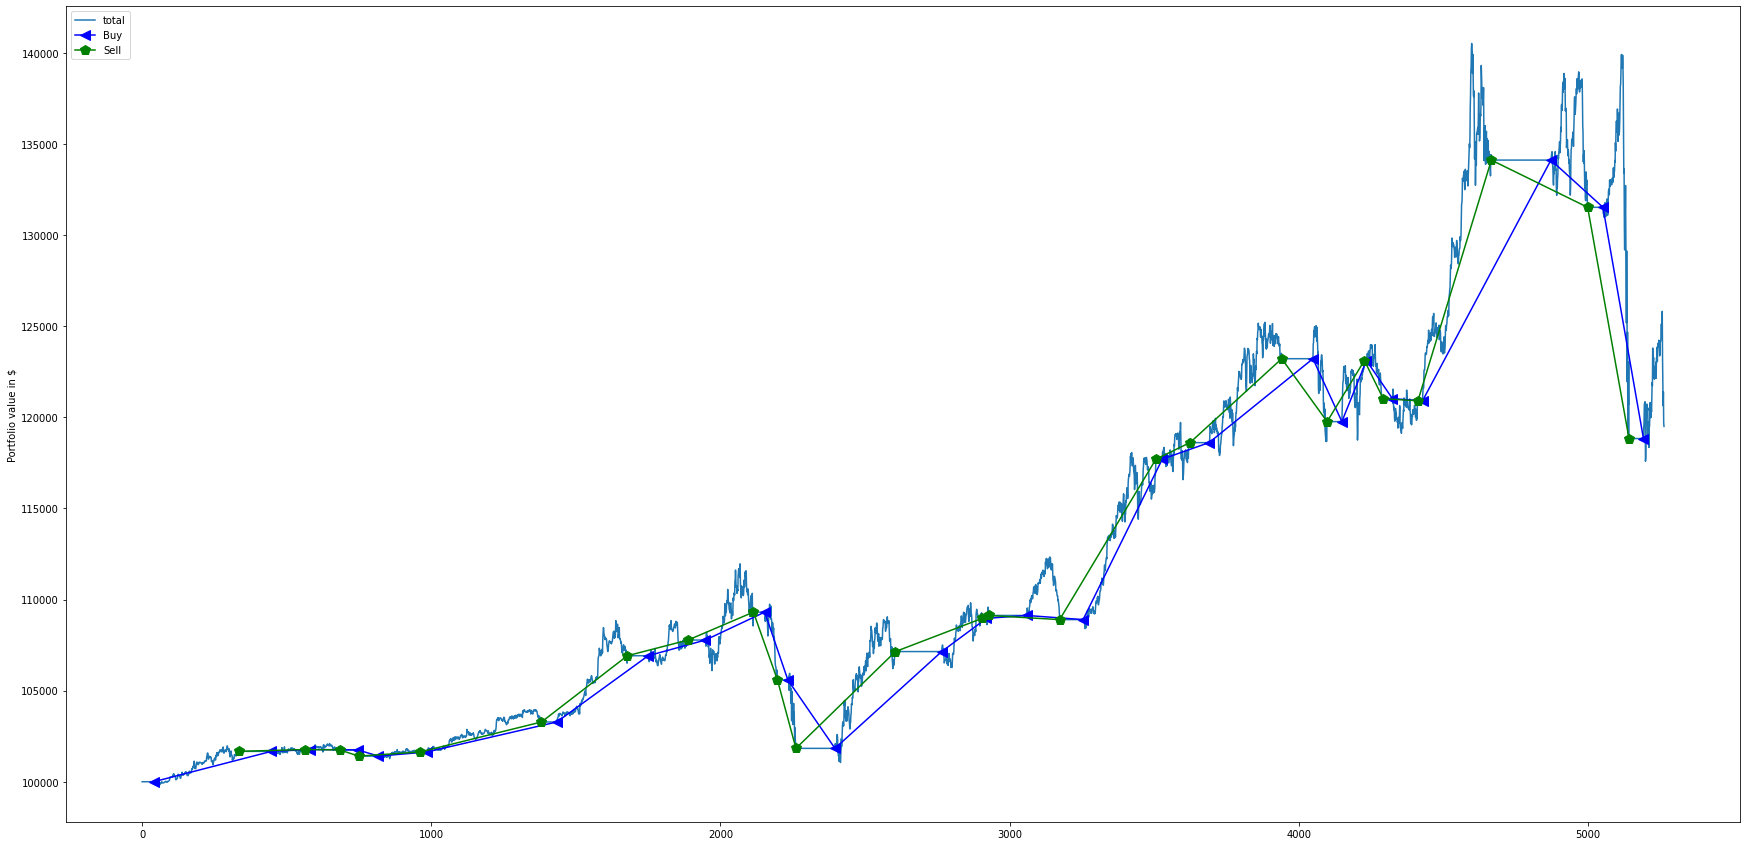

In [291]:
portfolio['total'].plot(figsize=(30,15))
portfolio.total[signals.positions == 1.0].plot(marker='<',markersize=10,color='blue',label='Buy')
portfolio.total[signals.positions==-1.0].plot(marker='p',markersize=10,color='green',label='Sell')
plt.ylabel('Portfolio value in $')
plt.legend(loc='upper left')
plt.show()

**you can use the Sharpe ratio to get to know whether your portfolio’s returns are the result of the fact that you decided to make smart investments or to take a lot of risks.The ideal situation is, of course, that the returns are considerable but that the additional risk of investing is as small as possible. That’s why, the greater the portfolio’s Sharpe ratio, the better: the ratio between the returns and the additional risk that is incurred is quite OK. Usually, a ratio greater than 1 is acceptable by investors 2 is very good and 3 is excellent**

**Note that the risk free rate that is excluded in the definition of the Sharpe ratio for this tutorial and that the Sharpe ratio is usually not considered as a standalone: it’s usually compared to other stocks. The best way to approach this issue is thus by extending your original trading strategy with more data (from other companies)!**

In [292]:
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio)

0.21974029119313687


**you can also calculate a Maximum Drawdown, which is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy**

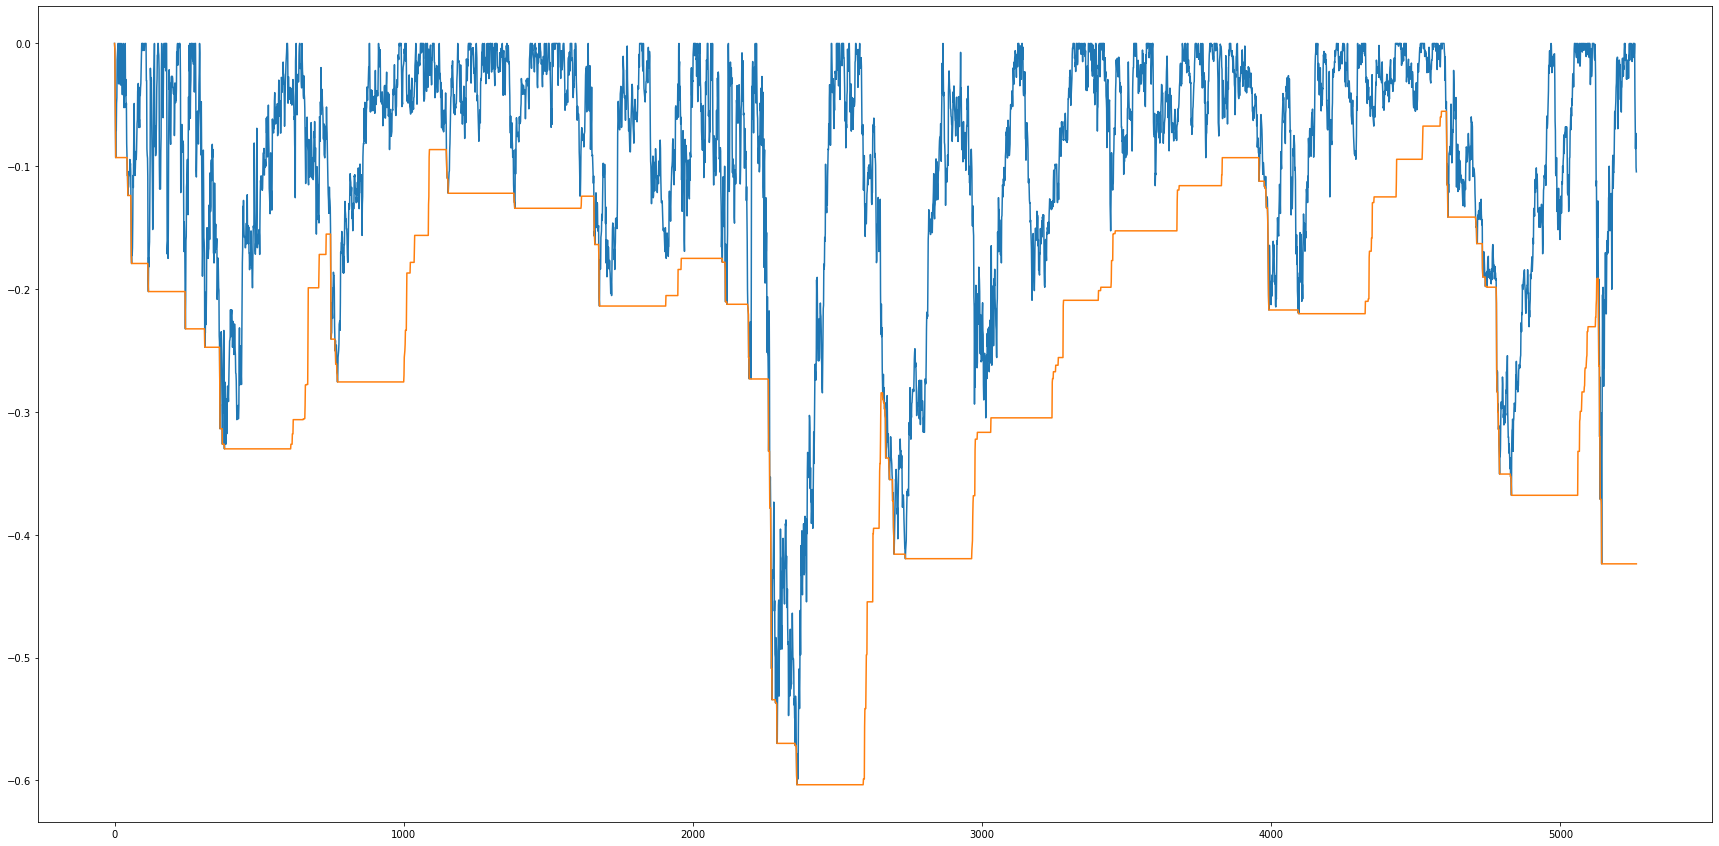

In [293]:
window = 230
rolling_max = BLK['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = BLK['Adj Close']/rolling_max - 1.0
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
daily_drawdown.plot(figsize=(30,15))
max_daily_drawdown.plot()
plt.show()

**The Below CAGR(Compund Annual Growth Rate) Is Performed On BlackRock[BLK] CAGR Tells Us About The Return Over A Particular Period of Time**

In [294]:
days=(BLK.index[5263] - BLK.index[0])
cagr=(((BLK.iloc[5263,5])/(BLK.iloc[0,5]))**(365.0/days)) - 1
cagr

0.32368481676200545